/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (8,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


76.92307692307693% of high crime areas are also high population density areas
AxesSubplot(0.125,0.125;0.775x0.755)
t = 3.758723026666418
p = 0.0007993416382458433


,zip_code,population_density,average_crimes_per_year,relative_population_density,relative_average_crime
0,48236,4063.763509,105.500000,Low,Low
1,48213,4093.111097,598.272727,Low,High
2,48216,2329.388427,318.727273,Low,Low
3,48221,7294.297823,728.238095,High,High
4,48215,3140.597741,416.733333,Low,Low
5,48227,5794.886419,1037.750000,High,High
6,48205,5883.854481,975.565217,High,High
7,48214,4108.854618,529.125000,Low,Low
8,48223,4000.838452,522.590909,Low,Low
9,48217,3368.585791,176.428571,Low,Low


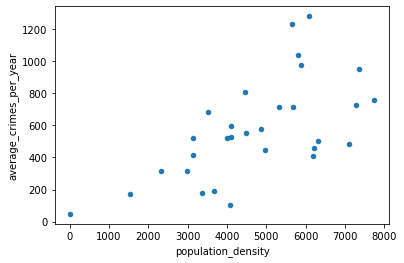

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 

#processing data and getting a clean dataframe to work with
def processing():
    df=pd.read_csv("TotalPopulation.csv")
    df2=pd.read_csv("Crime_Incidents.csv")
    df = df.rename(columns={'ZCTA5CE10':'zip_code'})
    newdf = pd.merge(df, df2, on='zip_code')
    pop = newdf[['zip_code', 'PopPerSqMile','year']]
    return pop

#getting average population density
def average_population_density(df):
    densities = df['PopPerSqMile'].unique().tolist()
    average_density = sum(densities) / len(densities)
    return average_density, densities

#getting average yearly crime rate for all the zip_codes
def average_crime_rate(df):
    zips = df[['zip_code','year']]
    zips = zips.groupby(['zip_code','year']).size().reset_index()
    zips = zips.rename(columns={0:'count'}).set_index(['zip_code','year'])
    zips = zips.reset_index(level=1)
    average_crimes_per_year = []
    zip_codes = df['zip_code'].unique()
    for code in zip_codes:
        area = zips.loc[code]
        average = area['count'].mean()
        average_crimes_per_year.append(average)
    total_average = sum(average_crimes_per_year) / len(average_crimes_per_year)
    return total_average, average_crimes_per_year, zip_codes

#creating final dataframe for my output
def final_df(zip_codes,densities,average_crimes_per_year,average_density,total_average):
    final = pd.DataFrame({'zip_code':zip_codes,'population_density':densities,'average_crimes_per_year':average_crimes_per_year})
    final['relative_population_density'] = np.where(final['population_density'] > average_density, 'High','Low')
    final['relative_average_crime'] = np.where(final['average_crimes_per_year'] > total_average, 'High','Low')
    return final
    
#get percentage of high crime areas that are also high population dense
def percent(df):
    high_crime = df[df['relative_average_crime'] == 'High']
    high_crime_and_density = high_crime[high_crime['relative_population_density'] == 'High']
    len_high_crime = len(high_crime)
    len_high = len(high_crime_and_density)
    percent_high = (100*(len_high / len_high_crime))
    print(str(percent_high) + "% of high crime areas are also high population density areas")
    return percent_high

#graph scatter plot comparing population density and average crimes per year
def graph(df):
    plot = df.plot.scatter(x='population_density', y='average_crimes_per_year', alpha=1)
    print(plot)

#perform t-test to see if difference between crime rates in high population density and low population density areas are statistically significant
def t_test(df):
    high_density_crime_rates = df[df['relative_population_density'] == 'High']['average_crimes_per_year'].tolist()
    low_density_crime_rates = df[df['relative_population_density'] == 'Low']['average_crimes_per_year'].tolist()
    t, p = stats.ttest_ind(high_density_crime_rates,low_density_crime_rates)
    print("t = " + str(t))
    print("p = " + str(p))
    return t, p


pop = processing()
average_density = average_population_density(pop)[0]
densities = average_population_density(pop)[1]


total_average = average_crime_rate(pop)[0]
average_crimes_per_year = average_crime_rate(pop)[1]
zip_codes = average_crime_rate(pop)[2]


final = final_df(zip_codes,densities,average_crimes_per_year,average_density,total_average)


percent(final)
graph(final)
t_test(final)
final

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

......

76.92307692307693% of high crime areas are also high population density areas
t = 3.758723026666418
p = 0.0007993416382458433
t = 3.758723026666418
p = 0.0007993416382458433



----------------------------------------------------------------------
Ran 6 tests in 0.017s

OK
